In [1]:
#Sentiment Analysis NLP - Mar 2
# Group Members: Yazan Khalaf, Michelle Chong, Karl Dobrota
#import the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk 

In [2]:
data = pd.read_csv ('tweet_emotions.csv')

In [3]:
data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [4]:
data["sentiment"] = data["sentiment"].astype('category')
data.dtypes
data["sentiment"] = data["sentiment"].cat.codes
data.head()

,tweet_id,sentiment,content
0,1956967341,2,@tiffanylue i know i was listenin to bad habi...
1,1956967666,10,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,10,Funeral ceremony...gloomy friday...
3,1956967789,3,wants to hang out with friends SOON!
4,1956968416,8,@dannycastillo We want to trade with someone w...


In [6]:
#Cleaning the texts
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = [] #Creating an empty bag

#to fill the bag with words, it needs to go through each row (each comment), break it down and 
#add it to the bag

for i in range(40000):
    review = re.sub( '[^a-zA-Z]',' ', data['content'][i])
    review = review.lower() #Convert everything ot the lower case
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Payba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
corpus

['tiffanylu know listenin bad habit earlier start freakin part',
 'layin n bed headach ughhhh waitin call',
 'funer ceremoni gloomi friday',
 'want hang friend soon',
 'dannycastillo want trade someon houston ticket one',
 'ping ghostridah go prom bc bf like friend',
 'sleep im think old friend want marri damn amp want scandal',
 'hmmm http www djhero com',
 'charviray charlen love miss',
 'kelcouch sorri least friday',
 'cant fall asleep',
 'choke retain',
 'ugh beat stupid song get next rude',
 'brodyjenn u watch hill london u realis tourtur week week late watch itonlinelol',
 'got news',
 'storm electr gone',
 'annarosekerr agre',
 'sleepi even late fail',
 'perezhilton ladi gaga tweet impress video leak know',
 'convinc alway want signal give damn think lost anoth friend',
 'raaaaaaek oh bad hope get better sleep issu late',
 'wonder awak write new song plot evil secret plot muahahaha oh damn secret anymor',
 'topic map talk balisag markup confer program onlin http tr im ml z via b

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) # max 1500 different unique words to values
X = cv.fit_transform(corpus).toarray()
y= data.iloc[:,1].values

In [12]:
import sklearn.linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

model = sklearn.linear_model.LogisticRegression(max_iter=41000)
model.fit(X,y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test, y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        44
           2       0.16      0.01      0.03       217
           3       0.05      0.01      0.01       184
           4       0.10      0.03      0.05       474
           5       0.32      0.33      0.33      1279
           6       0.34      0.18      0.23       337
           7       0.46      0.38      0.41       964
           8       0.34      0.59      0.43      2178
           9       0.16      0.05      0.08       394
          10       0.33      0.26      0.29      1244
          11       0.15      0.05      0.07       552
          12       0.34      0.40      0.37      2111

    accuracy                           0.34     10000
   macro avg       0.21      0.18      0.18     10000
weighted avg       0.31      0.34      0.31     10000



C:\Users\Payba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Payba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Payba\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\Payba\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.00      0.00      0.00        44
           2       0.04      0.06      0.05       217
           3       0.02      0.02      0.02       184
           4       0.11      0.05      0.07       474
           5       0.24      0.20      0.22      1279
           6       0.20      0.10      0.13       337
           7       0.39      0.31      0.34       964
           8       0.27      0.65      0.38      2178
           9       0.18      0.02      0.04       394
          10       0.29      0.15      0.20      1244
          11       0.08      0.02      0.03       552
          12       0.30      0.16      0.21      2111

    accuracy                           0.26     10000
   macro avg       0.16      0.13      0.13     10000
weighted avg       0.25      0.26      0.23     10000



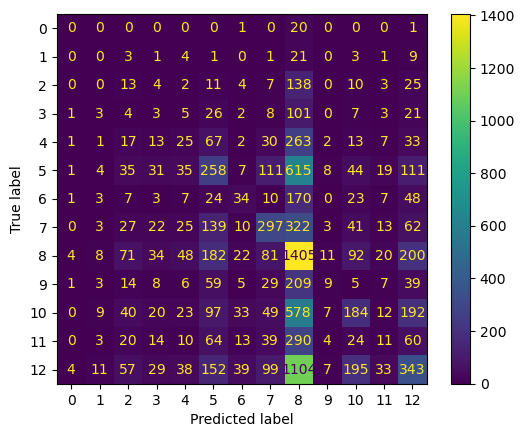

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()